In [38]:
import aplpy
from astropy import coordinates as coords
from astropy import units as u
from astropy import utils
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astroquery.sdss import SDSS
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import pyvo as vo

In [ ]:
print cats[14].res_title

In [ ]:
cats = vo.regsearch(servicetype='sia', waveband='optical')
for cat in cats:
    print cat.res_title, cat.access_url

In [52]:
fitsRA = 011.888058
fitsDEC = -25.288800
framesize = 10*u.arcmin
frame='icrs'
myLocation = SkyCoord(fitsRA*u.deg, fitsDEC*u.deg, frame = frame)

urls = ['https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=nvss&',
        'https://skyview.gsfc.nasa.gov/cgi-bin/vo/sia.pl?survey=sdssdr7&',
        'http://cda.harvard.edu/cxcsiap/queryImages?']
fitsimages = {}
fitsimagenames = ['VLA', 'SDSS', 'Chandra']
for i, (url, fitsimagename) in enumerate(zip(urls, fitsimagenames)):
    query = vo.sia.SIAQuery(url,
                            pos=(myLocation.ra.deg, myLocation.dec.deg),
                            size = framesize, format='image/fits',
                            intersect='covers')
    results = query.execute()
    print "Downloading {}...".format(fitsimagename)
    try:
        url = results[0].getdataurl()
        fitsimages['{}'.format(fitsimagename)] = fits.open(utils.data.download_file(url, timeout=300,
                                                                                    show_progress=False))
        print "Success!"
    except IndexError:
        print "No data currently available for {} :( ".format(fitsimagename)
        fitsimages['{}'.format(fitsimagename)] = 0

Success!
No data currently available for SDSS :( 


Success!


INFO: Auto-setting vmax to  1.727e+00 [aplpy.core]


INFO: Auto-setting vmax to  1.000e+00 [aplpy.core]


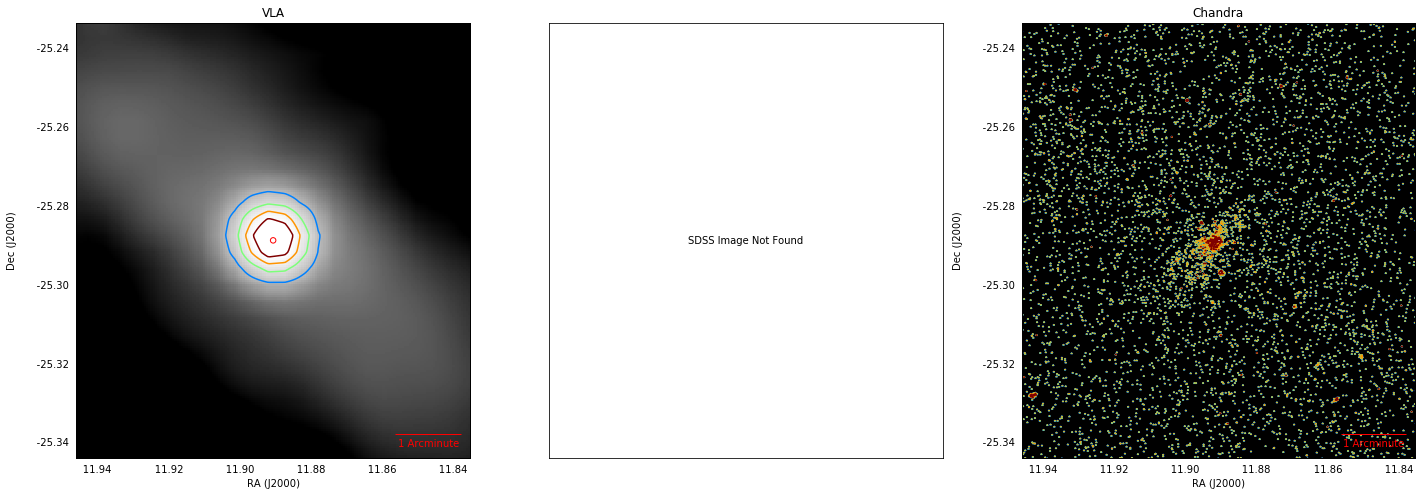

In [62]:
height_ratios = [8]
width_ratios = [8,8,8]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)

names = ['VLA', 'SDSS', 'Chandra']
for i, image in enumerate([fitsimages['VLA'],
                           fitsimages['SDSS'],
                           fitsimages['Chandra']]):
    ax = fig.add_subplot(gs[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if image != 0:
        ax = aplpy.FITSFigure(image,figure=fig,
                              subplot=list(gs[i].get_position(fig).bounds))
        
        ax.recenter(myLocation.ra,myLocation.dec,radius=.05)
        ax.show_grayscale(stretch='log', vmin=1e-2)
        ax.show_markers(myLocation.ra,myLocation.dec)
        ax.show_contour(levels=5)
        ax.add_scalebar(1*u.arcminute, '1 Arcminute', color='red')
        ax.set_title('{}'.format(names[i]))
        
        ax.set_xaxis_coord_type('scalar')
        ax.set_yaxis_coord_type('scalar')
        ax.tick_labels.set_xformat('%11.2f')
        ax.tick_labels.set_yformat('%11.2f')
#         ax.ticks.hide()
#         ax.tick_labels.hide()
#         ax.axis_labels.hide()
    elif image == 0:
        ax = plt.text(0.5, 0.5,'{} Image Not Found'.format(names[i]),
                      horizontalalignment='center',
                      verticalalignment='center',
                      transform = ax.transAxes)
plt.savefig('test4.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.suptitle('')

ax = aplpy.FITSFigure(fitsimages['Hubble_fitsimage'],figure=fig,)
ax.show_colorscale(cmap='gray',vmin=0)   
ax.add_colorbar()

ax.add_scalebar(2*u.arcminute, '2 Arcminutes', color='white')

ax.set_title('{}'.format(filename))
# ax.set_xaxis_coord_type('scalar')
# ax.set_yaxis_coord_type('scalar')
# ax.tick_labels.set_xformat('%11.3f')
# ax.tick_labels.set_yformat('%11.3f')
ax.ticks.hide()

ax = fig.gca()

ax.patch.set_alpha(0.0)
plt.savefig('{}.png'.format(filename))
plt.show()